In [1]:
import pandas as pd

In [61]:
df = pd.read_csv("stats.csv")
df = df.rename(columns={" first_name": "first_name"})
df["full_name"] = df.apply(lambda x: x['last_name'] + x['first_name'][1:3], axis=1)
df = df.set_index("full_name")
df = df.drop(columns=["last_name", "first_name", "player_id", "year", 'Unnamed: 68'])
df = df.fillna(0)
df.head()

,p_game,p_formatted_ip,p_total_pa,p_total_hits,p_single,p_double,p_triple,p_home_run,p_strikeout,p_walk,...,si_avg_speed,si_avg_spin,si_avg_break,fc_avg_speed,fc_avg_spin,fc_avg_break,fs_avg_speed,fs_avg_spin,fs_avg_break,n_kn_formatted
full_name,,,,,,,,,,,,,,,,,,,,,
WainwrightAd,32,191.2,803,192,138,35,3,16,143,54,...,88.6,2201.0,17.9,84.3,2411.0,9.3,0.0,0.0,0.0,0.0
GreinkeZa,26,137.0,585,157,113,30,0,14,73,27,...,89.3,2203.0,15.9,85.8,2377.0,9.3,0.0,0.0,0.0,0.0
VerlanderJu,28,175.0,666,116,88,15,1,12,185,29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SanchezAn,14,69.1,292,55,32,9,1,13,48,33,...,89.1,1926.0,18.3,87.3,2095.0,12.6,0.0,0.0,0.0,0.0
JansenKe,65,64.0,260,45,28,6,3,8,85,22,...,93.6,2231.0,20.0,92.2,2567.0,18.6,0.0,0.0,0.0,0.0


In [72]:
from sklearn.manifold import MDS, TSNE

# mds = MDS(random_state=0)
tsne = TSNE()
scaled_df = mds.fit_transform(df)

df["x"]=scaled_df[:,0]
df["y"]=scaled_df[:,1]


/home/luna.kuleuven.be/r0787607/miniconda3/envs/mds/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


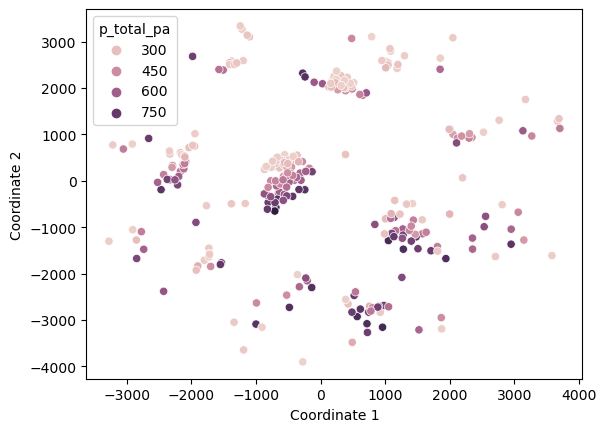

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#create scatterplot
sns.scatterplot(data=df, x="x", y="y", hue="p_total_pa")

#add axis labels
plt.xlabel('Coordinate 1')
plt.ylabel('Coordinate 2')

#add lables to each point
# for i, txt in enumerate(df.index):
#     plt.annotate(txt, (scaled_df[:,0][i]+.3, scaled_df[:,1][i]))

#display scatterplot
plt.show()